# **Data Pre Processing**

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import os
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


### **Visualization of the audio signal**

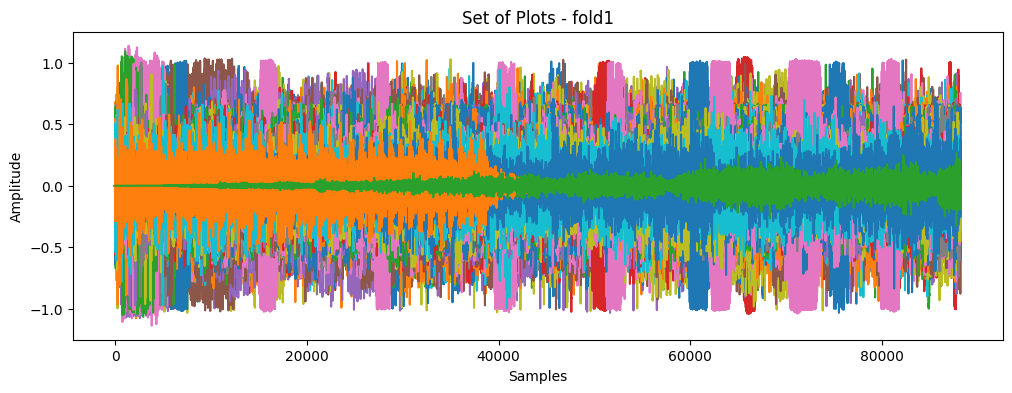

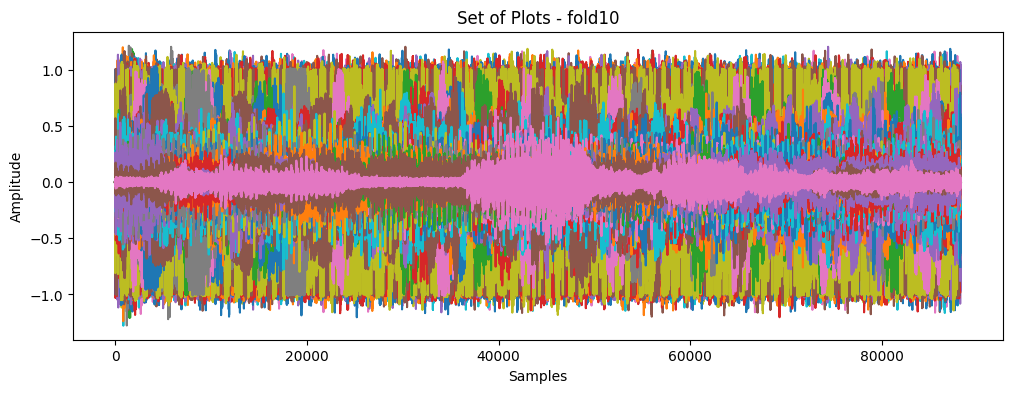

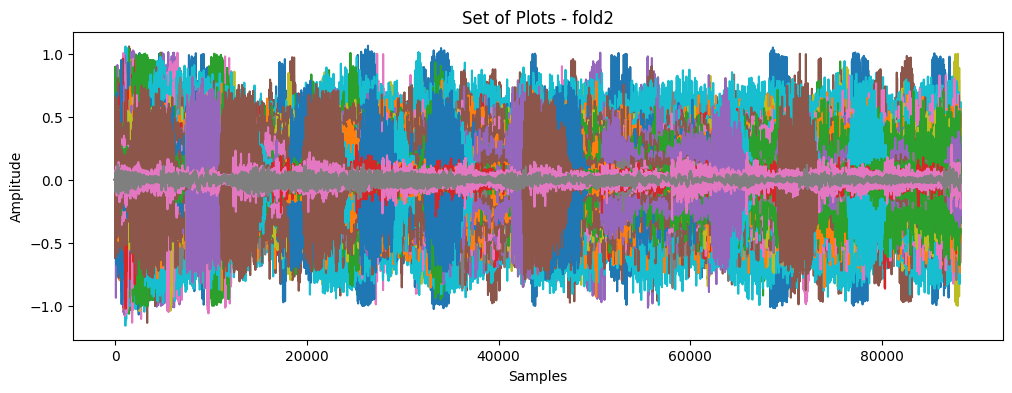

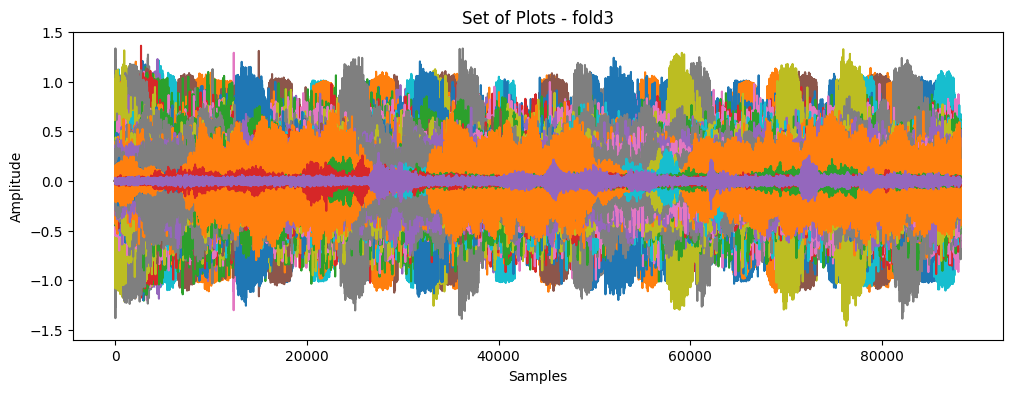

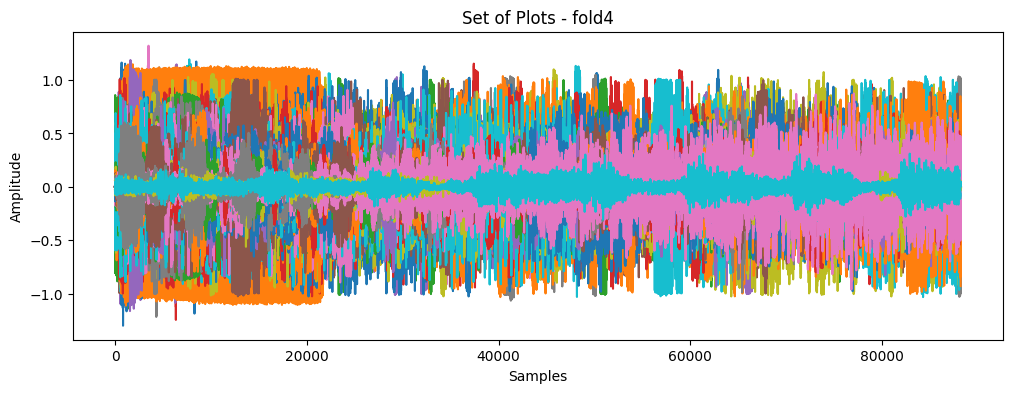

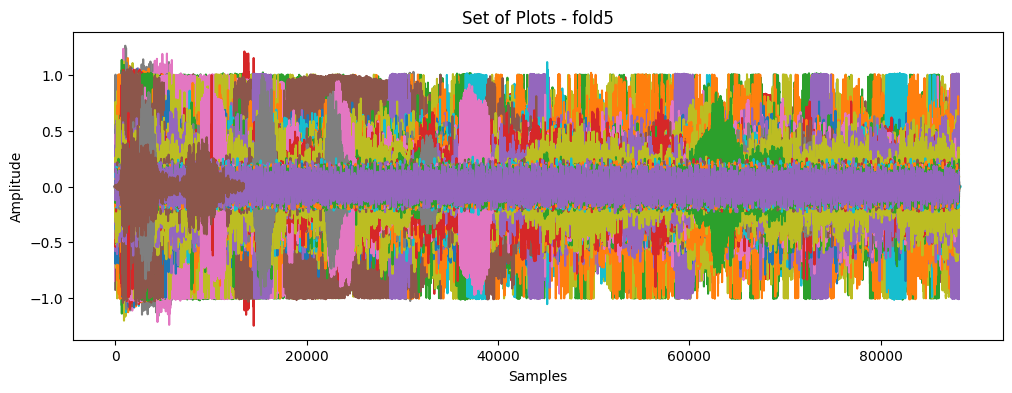

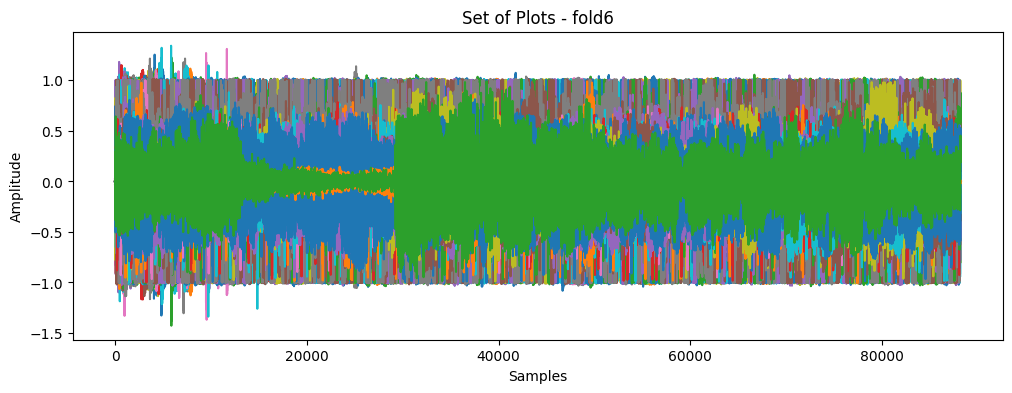

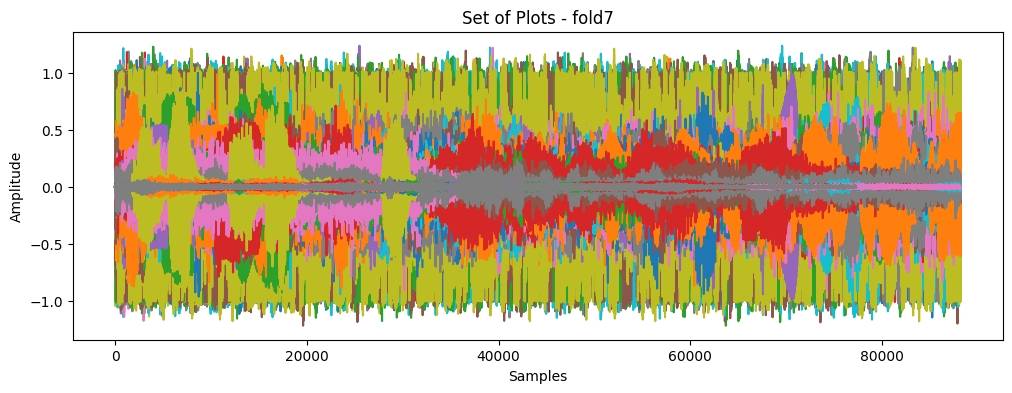

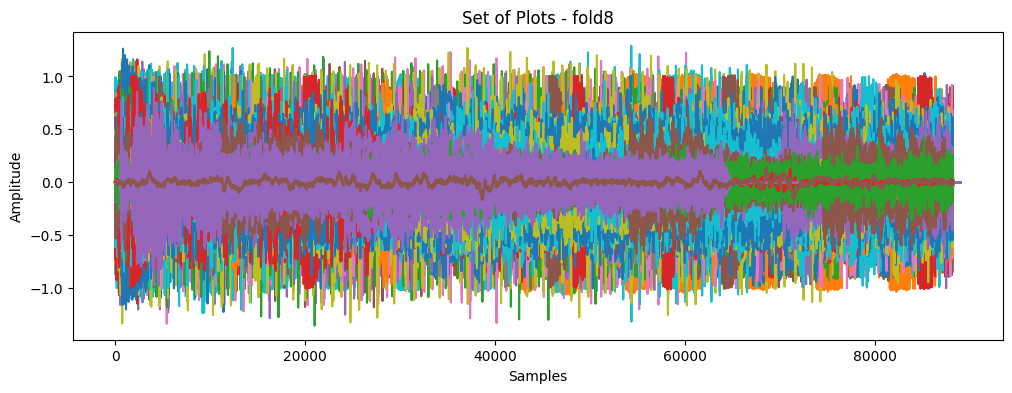

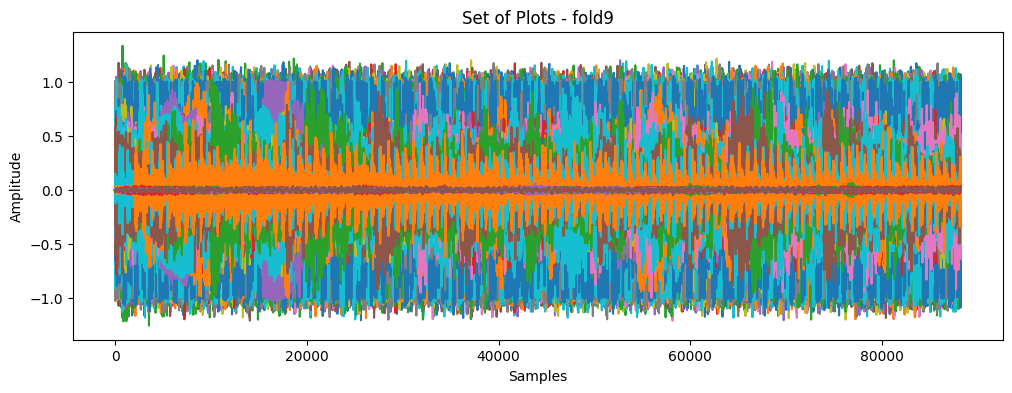

In [ ]:

input_path = "/content/drive/MyDrive/UrbanSound8K/audio"


# Array of the folders to be analyzed
folders_to_analyze = [folder for folder in os.listdir(input_path)]
folders_to_analyze.sort()  # Order the folders

for audio_folder in folders_to_analyze:
    audio_folder_path = os.path.join(input_path, audio_folder)

    if os.path.isdir(audio_folder_path):
        plt.figure(figsize=(12, 4))

        for audio_file in os.listdir(audio_folder_path):
                audio_file_path = os.path.join(audio_folder_path, audio_file)

                # Load audio file
                try:
                    y, sr = librosa.load(audio_file_path)
                    plt.plot(y)
                except Exception as e:
                    print(f"Error loading {audio_file}: {e}")

        plt.title(f'Set of Plots - {audio_folder}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.show()


## **Standardize the time of the audio files**

### Repete the audio files until it reached 4 seconds

In [ ]:

input_path = "/content/drive/MyDrive/UrbanSound8K/audio"

# Array of folders to be analyzed
folders_to_analyze = [folder for folder in os.listdir(input_path)]
folders_to_analyze.sort()  # Order the folders
print(folders_to_analyze)

# Duration requirement
target_duration = 4.0

# Repeat audio to meet the duration requirement
def repeat_audio_to_duration(y, sr, target_duration):
    original_duration = librosa.get_duration(y=y, sr=sr)

    while original_duration < target_duration:
        # Repeat the entire audio to fill the remaining duration
        y = np.concatenate([y, y])
        original_duration = librosa.get_duration(y=y, sr=sr)

    # Trim the audio to exactly target_duration seconds
    y = y[:int(target_duration * sr)]

    return y

# Repeat audio files to meet the duration requirement and replace the original files
for audio_folder in folders_to_analyze:
    audio_folder_path = os.path.join(input_path, audio_folder)

    # Verify if audio_folder_path is a folder (to ignore .DS_Store)
    if os.path.isdir(audio_folder_path):
      for audio in os.listdir(audio_folder_path):
        if audio.endswith('.wav'):

          # Load the audio file
          audio_file_path = os.path.join(audio_folder_path, audio)
          y, sr = librosa.load(audio_file_path, sr=None)  # sr=None to use the original sampling rate

          # Create output folder path
          output_folder_path = os.path.join(input_path, f"{audio_folder}_4sec")
          os.makedirs(output_folder_path, exist_ok=True)

          # Ensure the audio has exactly 4 seconds
          if librosa.get_duration(y=y, sr=sr) != target_duration:
              # Repeat the audio to meet the duration requirement and trim if necessary
              y = repeat_audio_to_duration(y, sr, target_duration)

              print(f"Audio adjusted to {target_duration} seconds and saved in {output_folder_path}")
          else:
              print(f"Audio already has {target_duration} seconds, saved in {output_folder_path}")

          # Save the audio file in a folder named foldX_4sec
          sf.write(os.path.join(output_folder_path, audio), y, sr)  # Use soundfile.write


Streaming output truncated to the last 5000 lines.
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4.0 seconds, saved in /content/drive/MyDrive/UrbanSound8K/audio/fold4_4sec
Audio already has 4

### Verify if every audio file has indeed 4 seconds

In [ ]:

input_path = "/content/drive/MyDrive/UrbanSound8K/audio"


# Array of folders to be analyzed
folders_to_analyze = [folder for folder in os.listdir(input_path) if folder.endswith("_4sec")]
folders_to_analyze.sort()  # Order the folders

# Duration requirement
target_duration = 4.0

# Check if every audio file has exactly 4 seconds
all_files_have_target_duration = True

for audio_folder in folders_to_analyze:
    audio_folder_path = os.path.join(input_path, audio_folder)

    # Verify if audio_folder_path is a folder (to ignore .DS_Store)
    if os.path.isdir(audio_folder_path):
        for audio in os.listdir(audio_folder_path):
            # Load the audio file
            audio_file_path = os.path.join(audio_folder_path, audio)
            y, sr = librosa.load(audio_file_path, sr=None)  # sr=None to use the original sampling rate

            # Check if the audio has exactly 4 seconds
            if librosa.get_duration(y=y, sr=sr) != target_duration:
                all_files_have_target_duration = False
                break  # No need to check other files in this folder

if all_files_have_target_duration:
    print("Every audio file has 4 seconds")
else:
    print("Some audio files don't have 4 seconds")


Every audio file has 4 seconds
